# Model Validation

This notebook presents the analysis for validating our model's behavior and outputs. We begin by examining the results of **varying the primary independent variables** of interest to observe their impact on the system's performance.
Following this, we perform a **Sensitivity Analysis** to evaluate whether the system's behavioral trends remain consistent when additional parameters are modified.

## Performance Metrics

To evaluate the performance of the model, three metrics are defined.

### 1. Payoff by Tasks ($\theta_{\text{tasks}}$)

This metric calculates the total payoff after a run based on the difficulty levels of tasks completed during the simulation. Tasks are weighted by their difficulty, with higher difficulty tasks contributing more to the payoff.

The formula for calculating the total payoff is as follows:
$$
\begin{align*}
    T_i \in \mathbb{N} \quad : \quad & \text{Total number of tasks finished per difficulty level} \\[10pt]
    i \in \{1, 2, ..., 5\} \quad : \quad & \text{Defines the difficulty levels} \\[10pt]
    w_i = i \quad : \quad & \text{Weighting of each task by there difficulty level} \\[10pt]
    \theta_{\text{tasks}} = \sum_{i=1}^{5} w_i \cdot T_i \quad : \quad & \text{Payoff by tasks} \\[10pt]
\end{align*}
$$

### 2. Payoff per Node ($\theta_{\text{nodes}}$)

This metric calculates the payoff per worker in the simulation. It divides the total payoff ($\theta_{\text{tasks}}$) by the average number of active nodes across all ticks, providing a measure of task completion efficiency per worker.

The formula for the average payoff is:
$$
\begin{align*}
    t \in \mathbb{N}_{\leq 2080} \quad : \quad & \text{Ticks in the simulation}\\[10pt]
    N_t \in \mathbb{N} \quad : \quad & \text{Number of nodes at tick $t$}\\[10pt]
    \bar{N} = \frac{1}{2080}\sum_{t=0}^{2080} N_t \quad : \quad & \text{Average number of nodes across ticks}\\[10pt]
    \theta_{\text{nodes}} = \frac{\theta_{\text{tasks}}}{\bar{N}} \quad : \quad & \text{Payoff by node}\\[10pt]
\end{align*}
$$

### 3. Workforce Dynamics ($\theta_{\text{workforce}}$)

This metric captures the net workforce changes during the simulation by subtracting the total number of nodes fired from the total number of nodes hired. It indicates the stability and adaptability of the workforce in response to workload demands.
The formula for workforce dynamics is:
$$
\begin{align*}
    H \in \mathbb{N} \quad : \quad & \text{Total number of hired nodes}\\[10pt]
    F \in \mathbb{N} \quad : \quad & \text{Total number of fired nodes}\\[10pt]
    \theta_{\text{workforce}} = H - F \quad : \quad & \text{Payoff by node}\\[10pt]
\end{align*}
$$

## Imports

to run the notebook we used following imports:

In [106]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Experiments (Changing Dependent Variables)
This notebook contains a systematic exploration of the **Specialization & Communication Patterns Model** designed in NetLogo. The primary focus of the experiments is to analyze the impact of two key parameters:

1. **Number of Links (`num_links`)**: Determines the number of colleagues each worker is connected to, influencing task exchange and collaboration efficiency.
2. **Meeting Frequency (`meeting-freq`)**: Governs how often workers participate in coordinated task redistribution events with their colleagues.

The experiments aim to evaluate the effect of these parameters on our **payoff metrics**, as well as hiring and firing dynamics during the run. We changed the meeting frequency and the number of allowed links per node, with each run contained 3 repetitions:

- **Number of Links (```num_links```)**: $[1, 2, 3, 4, 5, 6, 7, 8]$
- **Meeting Frequency (```meeting-freq```)**: $[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80]$

The following parameters remained unchanged across all runs:
- **Number of tasks spawned (```number-of-tasks```)**: 4
- **Initial Number of Nodes (```number-of-nodes```)**: 20
- **Max idel time before fired (```max-idle-time```)**: 80
- **Learning Rate (```alpha```)**: 0.1
- **Stopping Condition (```stop-at-ticks```)**: 2080
- **Frequency of incomming tasks (```TASKS_EVERY```)**: 8

Total runs: 90

First we load the experiment data and define the variables we changed during the run.


In [107]:
# Load the data
file_path = "../experiments/tables/new2 FINAL-table.csv"
df_1 = pd.read_csv(file_path, skiprows=6)

# Only consider the last row of each run
df_1 = df_1.loc[df_1['[step]'] == 2079]

# Define the variables changed during the experiment
cols_oi_1 = ['num_links', 'meeting-freq']

### 1. Payoff by Task ($\theta_{\text{tasks}}$)

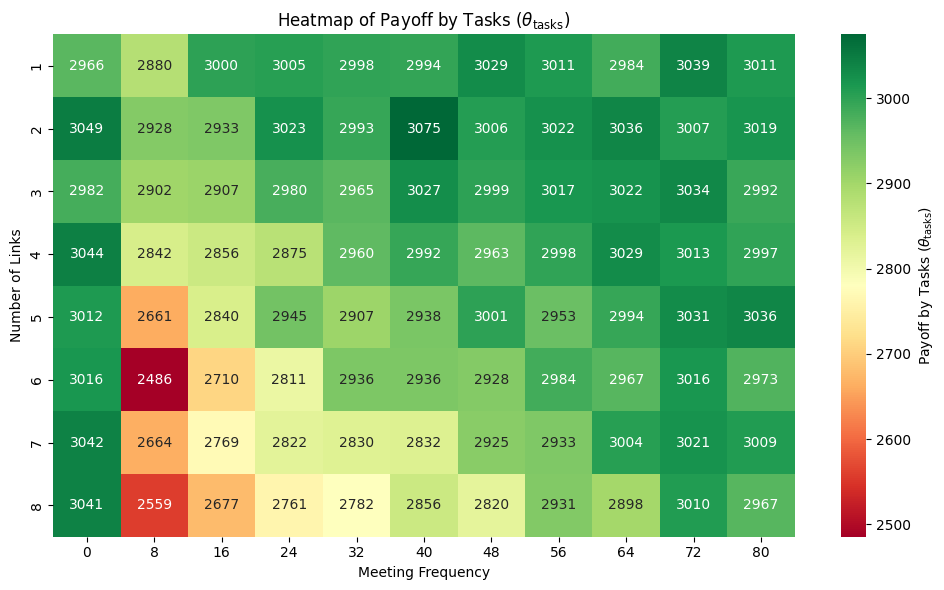

In [108]:
payoff_df = df_1.groupby(cols_oi_1)[["payoff_tasks_finished", "payoff_per_node_avg"]].mean()

# Unstack to reshape the data for plotting
payoff_df_unstacked = payoff_df.unstack(level=1)

# Plot heatmap for 'payoff_tasks_finished'
plt.figure(figsize=(10, 6))
sns.heatmap(payoff_df_unstacked['payoff_tasks_finished'], annot=True, cmap='RdYlGn', fmt=".0f", cbar_kws={'label': r'Payoff by Tasks ($\theta_{\text{tasks}}$)'})
plt.title(r"Heatmap of Payoff by Tasks ($\theta_{\text{tasks}}$)")
plt.xlabel("Meeting Frequency")
plt.ylabel("Number of Links")
plt.tight_layout()
plt.show()

### 2. Payoff by Node ($\theta_{\text{node}}$)


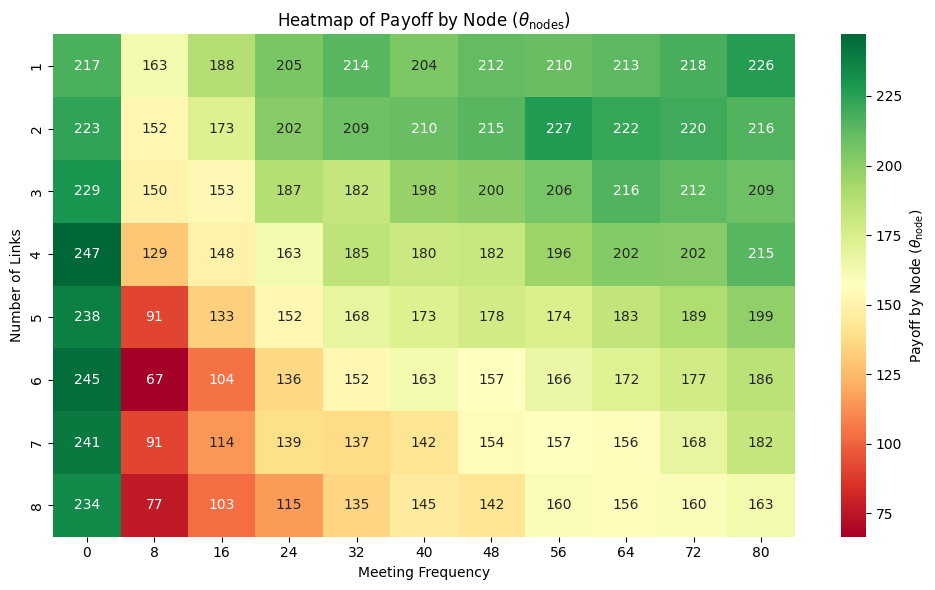

In [109]:
# Plot heatmap for 'payoff_per_node_avg'
plt.figure(figsize=(10, 6))
sns.heatmap(payoff_df_unstacked['payoff_per_node_avg'], annot=True, cmap='RdYlGn', fmt=".0f", cbar_kws={'label': r'Payoff by Node ($\theta_{\text{node}}$)'})
plt.title(r"Heatmap of Payoff by Node ($\theta_{\text{nodes}}$)")
plt.xlabel("Meeting Frequency")
plt.ylabel("Number of Links")
plt.tight_layout()
plt.show()

### 3. Workforce Dynamics ($\theta_{\text{workforce}}$)

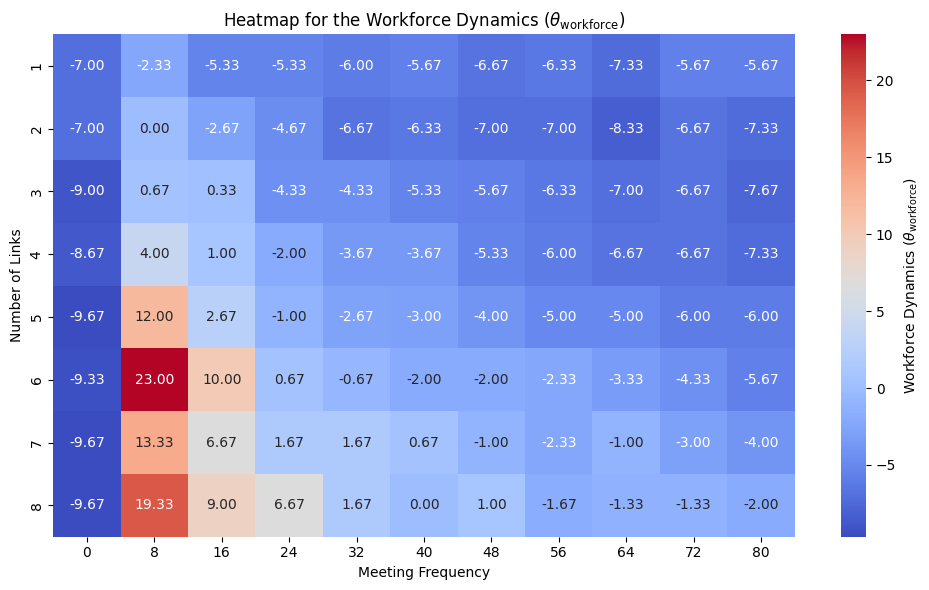

In [110]:
# Group by 'num_links' and 'meeting-freq', then calculate the max of 'fired' and 'hired'
df_grouped_fired = df_1.groupby(cols_oi_1)['fired'].mean()
df_grouped_hired = df_1.groupby(cols_oi_1)['hired'].mean()

# Unstack to reshape the data for plotting
mean_fired = df_grouped_fired.unstack(level=1)
mean_hired = df_grouped_hired.unstack(level=1)

# Calculate the difference: hired - fired
diff_hired_fired = mean_hired - mean_fired

# Plot heatmap for the difference (hired - fired)
plt.figure(figsize=(10, 6))
sns.heatmap(diff_hired_fired, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': r'Workforce Dynamics ($\theta_{\text{workforce}}$)'})
plt.title(r"Heatmap for the Workforce Dynamics ($\theta_{\text{workforce}}$)")
plt.xlabel("Meeting Frequency")
plt.ylabel("Number of Links")
plt.tight_layout()
plt.show()

#### 3.1 Fired/Hired Nodes


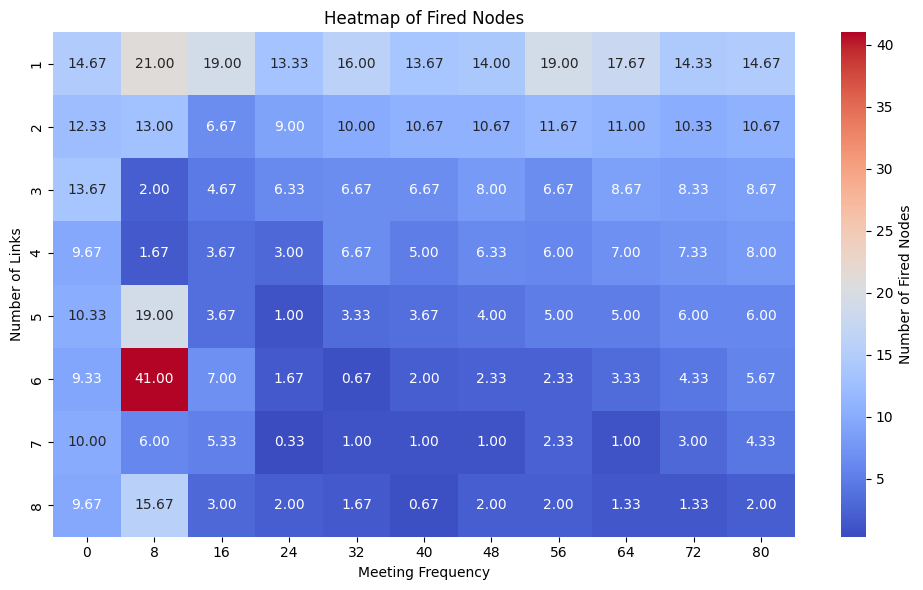

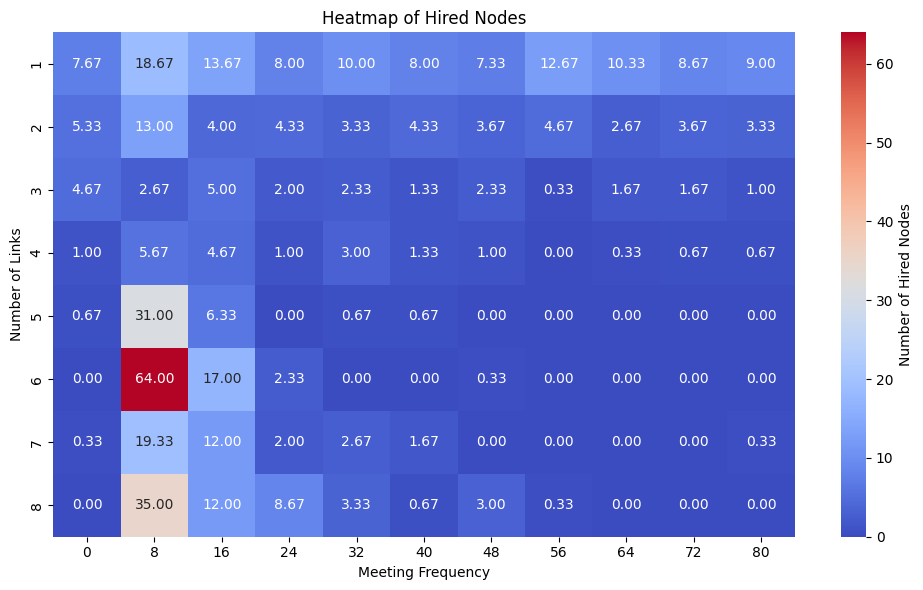

In [111]:
plt.figure(figsize=(10, 6))
sns.heatmap(mean_fired, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Number of Fired Nodes'})
plt.title("Heatmap of Fired Nodes")
plt.xlabel("Meeting Frequency")
plt.ylabel("Number of Links")
plt.tight_layout()
plt.show()

# Plot heatmap for 'hired' nodes
plt.figure(figsize=(10, 6))
sns.heatmap(mean_hired, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={'label': 'Number of Hired Nodes'})
plt.title("Heatmap of Hired Nodes")
plt.xlabel("Meeting Frequency")
plt.ylabel("Number of Links")
plt.tight_layout()
plt.show()

## Sensitivity Analysis
In this section we will see how the system behaves when changing additional variables:

- **Initial Number of Nodes (```number-of-nodes```)**: $[10, 20, 30]$
- **Number of tasks spawned (```number-of-tasks```)**: $[2, 4, 8, 16]$
- **Max idel time before fired (```max-idle-time```)**: $[16, 40, 56, 80]$
- **Learning Rate (```alpha```)**: $[0.05, 0.1, 0.15, 0.2]$

While changing the primary variables:

- **Number of Links (```num_links```)**: $[2, 4, 6]$
- **Meeting Frequency (```meeting-freq```)**: $[0, 8, 40, 80]$

First we define some helper functions to plot the heatmaps for the unique values of the changed variables. Each heatmap is wrt. num_links and meeting-freq.


In [112]:
# Helper function to compute the min and max for the colormap and plot heatmaps
def plot_heatmaps(df_2, cols_oi_2, metric, sens_param_1, alpha_values, figsize=(15, 4)):
    # Set up the plot layout
    fig, axes = plt.subplots(1, len(alpha_values), figsize=figsize, sharey=True)

    # Initialize the min and max values for the colormap
    cmap_min, cmap_max = float('inf'), float('-inf')

    # First pass: Determine the min and max values for the colormap across all heatmaps
    for val in alpha_values:
        df_alpha = df_2.loc[df_2[sens_param_1] == val]
        payoff_df = df_alpha.groupby(cols_oi_2)[["payoff_tasks_finished", "payoff_per_node_avg"]].mean()
        payoff_df_unstacked = payoff_df.unstack(level=1)

        # Update the colormap min and max based on the data for this value of alpha
        cmap_min = min(cmap_min, payoff_df_unstacked[metric].min().min())
        cmap_max = max(cmap_max, payoff_df_unstacked[metric].max().max())

    # Create a color bar axis
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position for the color bar

    # Second pass: Plot each heatmap with the consistent colormap range
    for i, val in enumerate(alpha_values):
        df_alpha = df_2.loc[df_2[sens_param_1] == val]
        payoff_df = df_alpha.groupby(cols_oi_2)[["payoff_tasks_finished", "payoff_per_node_avg"]].mean()
        payoff_df_unstacked = payoff_df.unstack(level=1)

        # Plot heatmap with consistent colormap range
        sns.heatmap(payoff_df_unstacked[metric], annot=True, cmap='RdYlGn', fmt=".0f", cbar=False,
                    vmin=cmap_min, vmax=cmap_max, ax=axes[i])

        # Set title and labels for each subplot
        axes[i].set_title(f"{sens_param_1}={val}")
        axes[i].set_xlabel("Meeting Frequency")
        if i == 0:
            axes[i].set_ylabel("Number of Links")
        else:
            axes[i].set_ylabel("")

    # Add the color bar only once
    fig.colorbar(axes[0].collections[0], cax=cbar_ax, label=f'Payoff by Node ($\\theta_{{node}}$)')

    plt.show()

# Plot for workforce dynamic (hired - fired)
def plot_workforce_dynamic(df_2, cols_oi_1, sens_param_1, alpha_values, figsize=(15, 4)):
    # Set up the plot layout
    fig, axes = plt.subplots(1, len(alpha_values), figsize=figsize, sharey=True)

    # Initialize the min and max values for the colormap
    cmap_min, cmap_max = float('inf'), float('-inf')

    # First pass: Determine the min and max values for the colormap across all heatmaps
    for val in alpha_values:
        df_alpha = df_2.loc[df_2[sens_param_1] == val]
        df_grouped_fired = df_alpha.groupby(cols_oi_1)['fired'].mean()
        df_grouped_hired = df_alpha.groupby(cols_oi_1)['hired'].mean()

        mean_fired = df_grouped_fired.unstack(level=1)
        mean_hired = df_grouped_hired.unstack(level=1)

        # Calculate the difference: hired - fired
        diff_hired_fired = mean_hired - mean_fired

        # Update colormap min and max
        cmap_min = min(cmap_min, diff_hired_fired.min().min())
        cmap_max = max(cmap_max, diff_hired_fired.max().max())

    # Create a color bar axis
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # Adjust position for the color bar

    # Second pass: Plot each heatmap with the consistent colormap range
    for i, val in enumerate(alpha_values):
        df_alpha = df_2.loc[df_2[sens_param_1] == val]
        df_grouped_fired = df_alpha.groupby(cols_oi_1)['fired'].mean()
        df_grouped_hired = df_alpha.groupby(cols_oi_1)['hired'].mean()

        mean_fired = df_grouped_fired.unstack(level=1)
        mean_hired = df_grouped_hired.unstack(level=1)

        # Calculate the difference: hired - fired
        diff_hired_fired = mean_hired - mean_fired

        # Plot heatmap
        sns.heatmap(diff_hired_fired, annot=True, cmap='RdYlGn', fmt=".0f", cbar=False,
                    vmin=cmap_min, vmax=cmap_max, ax=axes[i])

        # Set title and labels
        axes[i].set_title(f"{sens_param_1}={val}")
        axes[i].set_xlabel("Meeting Frequency")
        if i == 0:
            axes[i].set_ylabel("Number of Links")
        else:
            axes[i].set_ylabel("")

    # Add the color bar only once
    fig.colorbar(axes[0].collections[0], cax=cbar_ax, label=r'Workforce Dynamic ($\theta_{\text{workforce}}$)')

    plt.show()

## Changing: Learning Rate

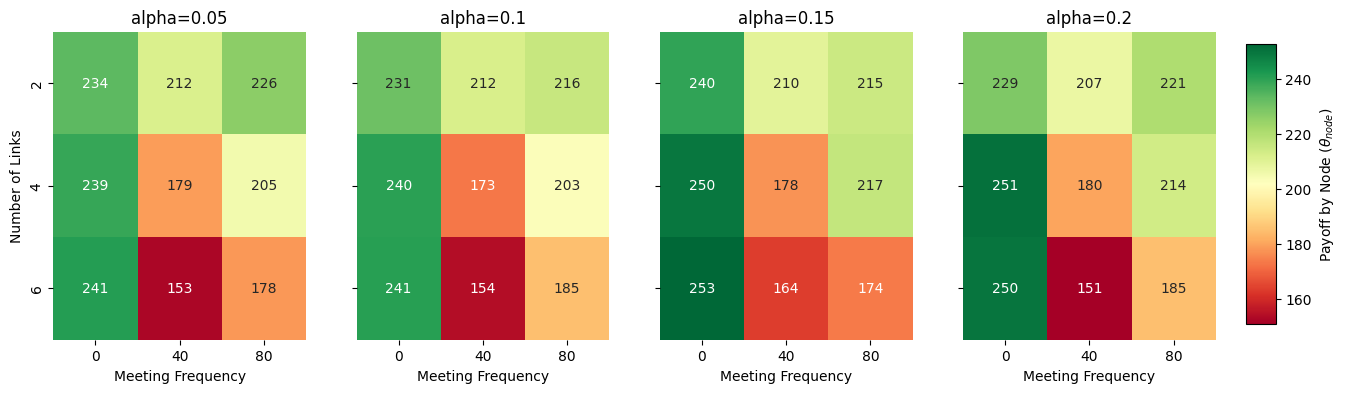

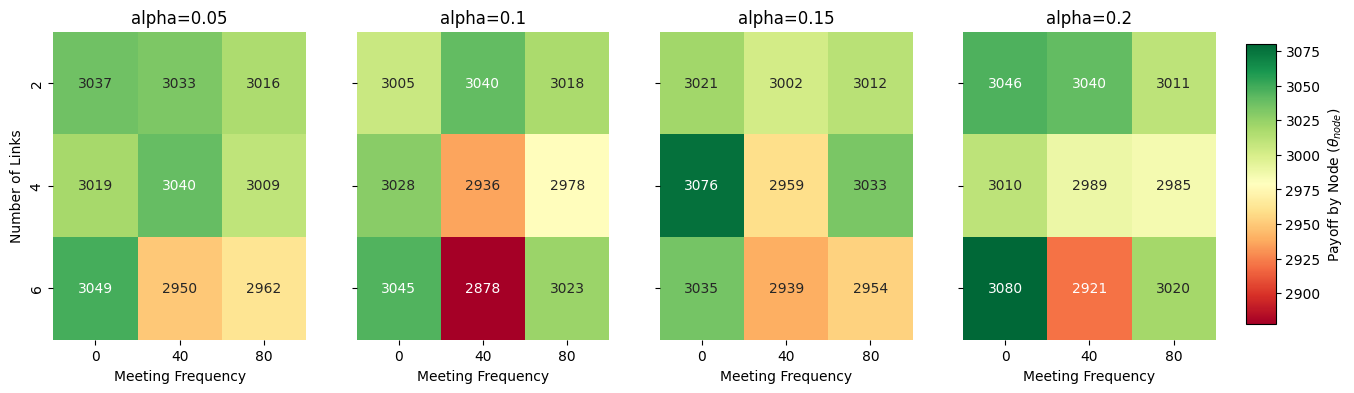

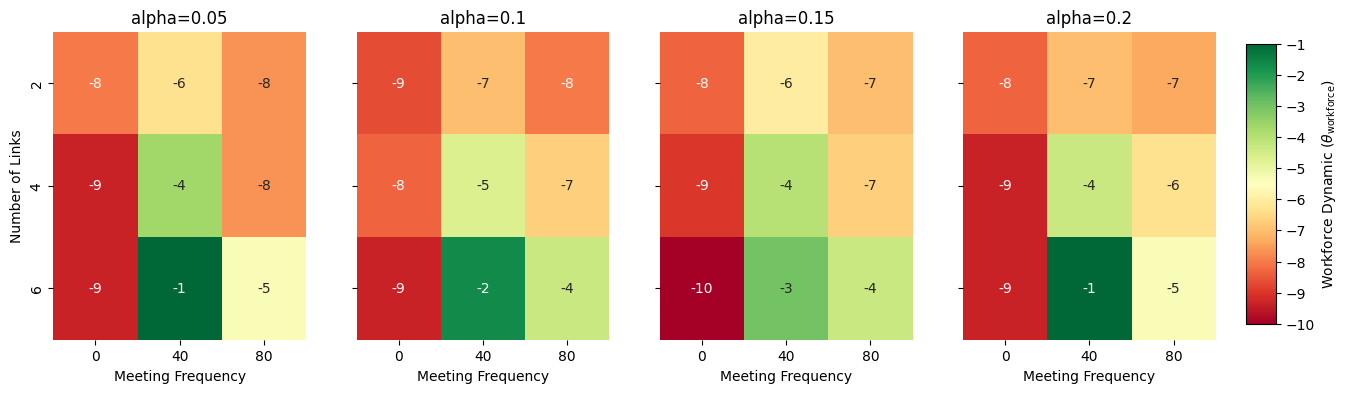

In [113]:
# Load the dataset (skip the first 6 lines)
file_path = "../experiments/tables/new2 FINAL_SENSITIV_LR-table.csv"
df_2 = pd.read_csv(file_path, skiprows=6)

# Filter the dataframe to consider only the last row for each run
df_2 = df_2.loc[df_2['[step]'] == 2079]

# Select columns for independent variables (num_links, meeting-freq) and the parameter to vary (alpha)
cols_oi_2 = ['num_links', 'meeting-freq']
sens_param_1 = 'alpha'

# Plot for 'payoff_per_node_avg'
plot_heatmaps(df_2, cols_oi_2, 'payoff_per_node_avg', sens_param_1, df_2[sens_param_1].unique())

# Plot for 'payoff_tasks_finished'
plot_heatmaps(df_2, cols_oi_2, 'payoff_tasks_finished', sens_param_1, df_2[sens_param_1].unique())

# Plot for workforce dynamic (hired - fired)
plot_workforce_dynamic(df_2, cols_oi_1, sens_param_1, df_2[sens_param_1].unique())

## Changing: Max idel time before fired

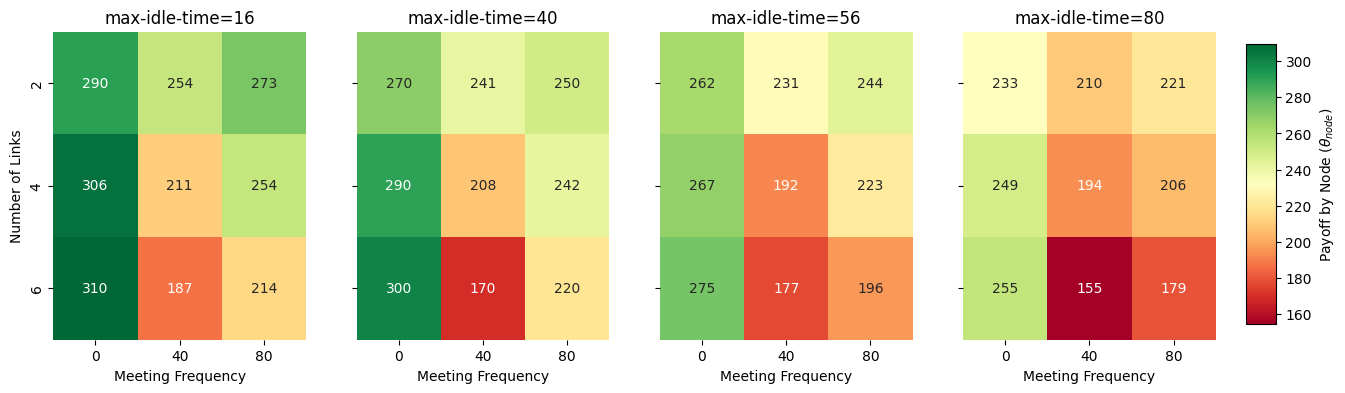

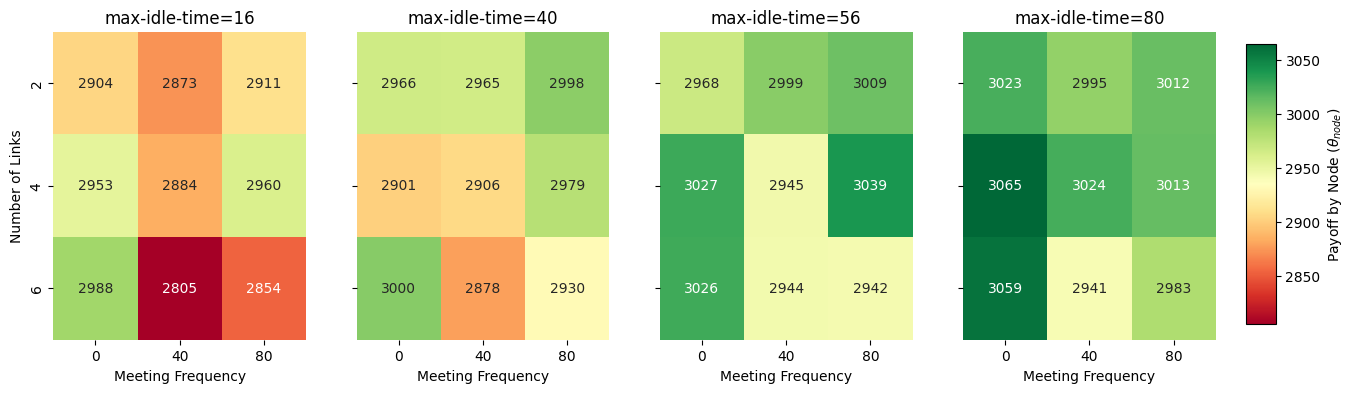

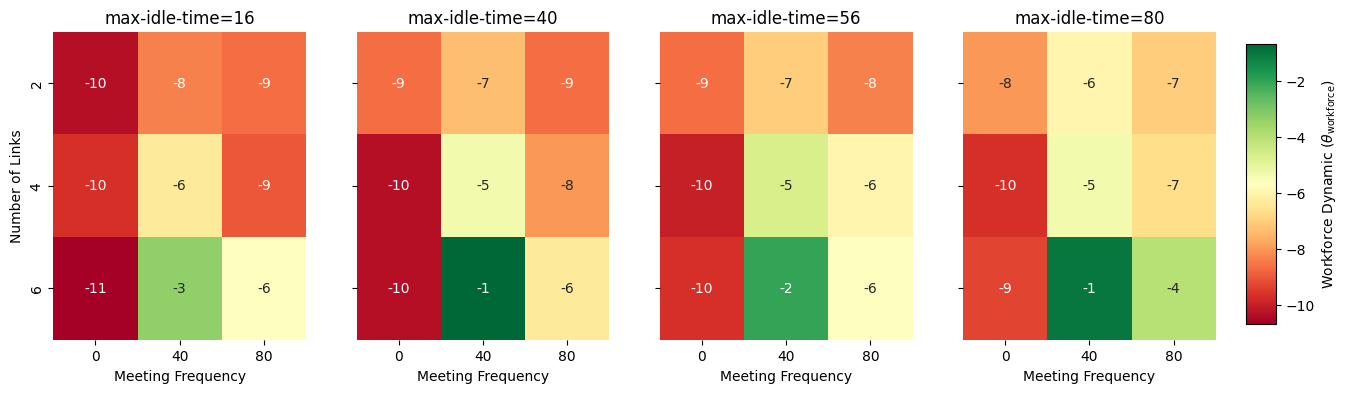

In [114]:
# Load the dataset (skip the first 6 lines)
file_path = "../experiments/tables/new2 FINAL_SENSITIV_IDLETIME-table.csv"
df_2 = pd.read_csv(file_path, skiprows=6)

# Filter the dataframe to consider only the last row for each run
df_2 = df_2.loc[df_2['[step]'] == 2079]

# Select columns for independent variables (num_links, meeting-freq) and the parameter to vary (alpha)
cols_oi_2 = ['num_links', 'meeting-freq']
sens_param_1 = 'max-idle-time'

# Plot for 'payoff_per_node_avg'
plot_heatmaps(df_2, cols_oi_2, 'payoff_per_node_avg', sens_param_1, df_2[sens_param_1].unique())

# Plot for 'payoff_tasks_finished'
plot_heatmaps(df_2, cols_oi_2, 'payoff_tasks_finished', sens_param_1, df_2[sens_param_1].unique())

# Plot for workforce dynamic (hired - fired)
plot_workforce_dynamic(df_2, cols_oi_1, sens_param_1, df_2[sens_param_1].unique())

## Changing: Initial Number of Nodes


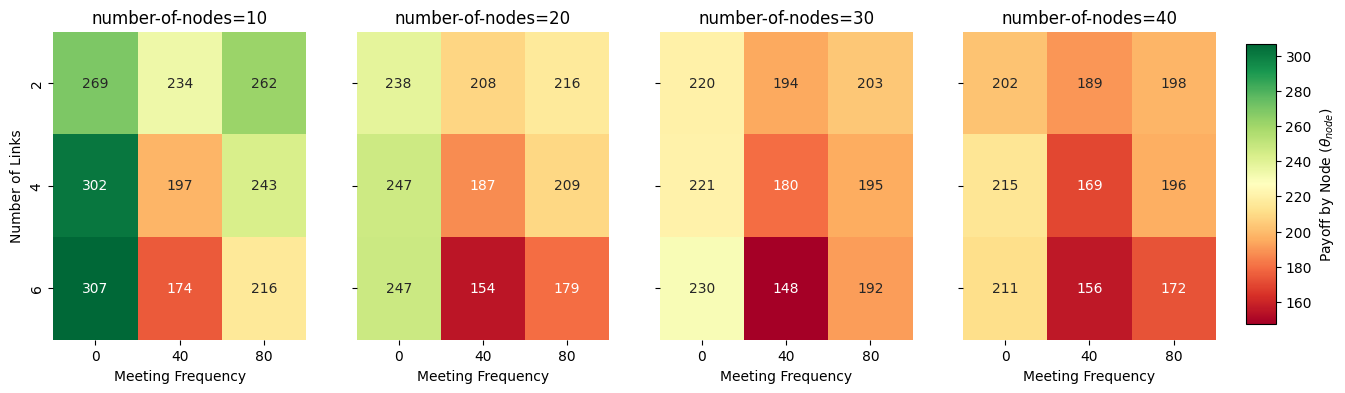

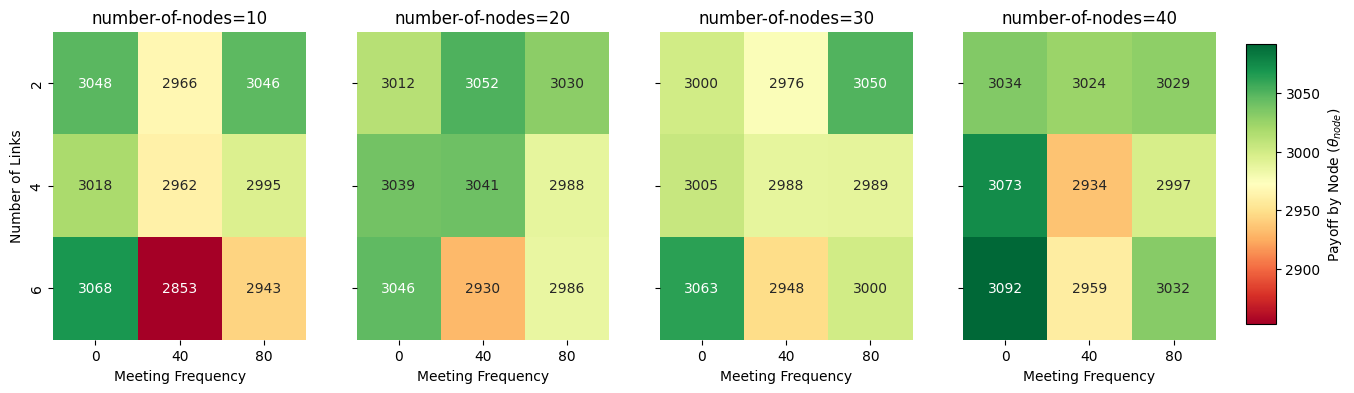

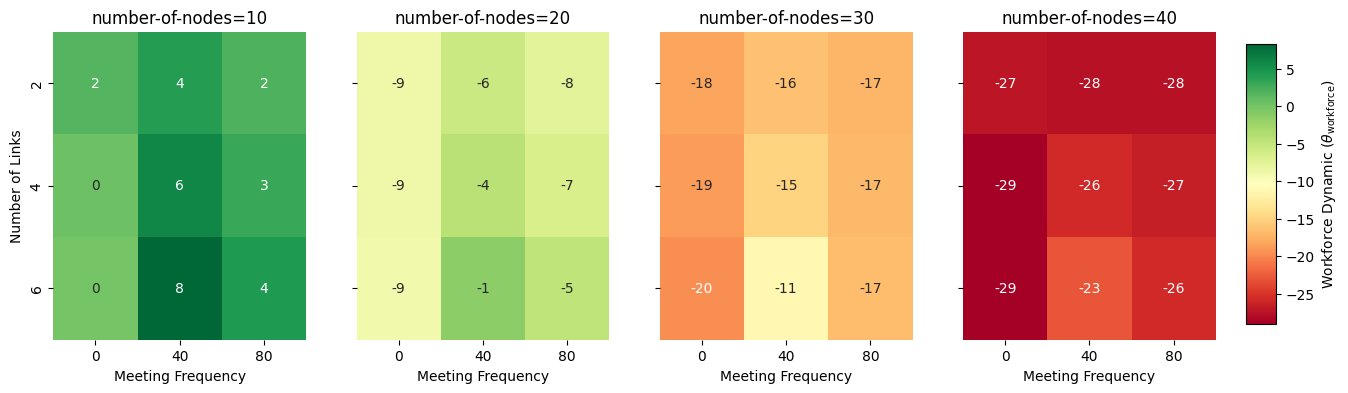

In [115]:
# Load the dataset (skip the first 6 lines)
file_path = "../experiments/tables/new2 FINAL_SENSITIV_NUM_NODES-table.csv"
df_2 = pd.read_csv(file_path, skiprows=6)

# Filter the dataframe to consider only the last row for each run
df_2 = df_2.loc[df_2['[step]'] == 2079]

# Select columns for independent variables (num_links, meeting-freq) and the parameter to vary (alpha)
cols_oi_2 = ['num_links', 'meeting-freq']
sens_param_1 = 'number-of-nodes'

# Plot for 'payoff_per_node_avg'
plot_heatmaps(df_2, cols_oi_2, 'payoff_per_node_avg', sens_param_1, df_2[sens_param_1].unique())

# Plot for 'payoff_tasks_finished'
plot_heatmaps(df_2, cols_oi_2, 'payoff_tasks_finished', sens_param_1, df_2[sens_param_1].unique())

# Plot for workforce dynamic (hired - fired)
plot_workforce_dynamic(df_2, cols_oi_1, sens_param_1, df_2[sens_param_1].unique())

## Changing: Number of tasks Spawned

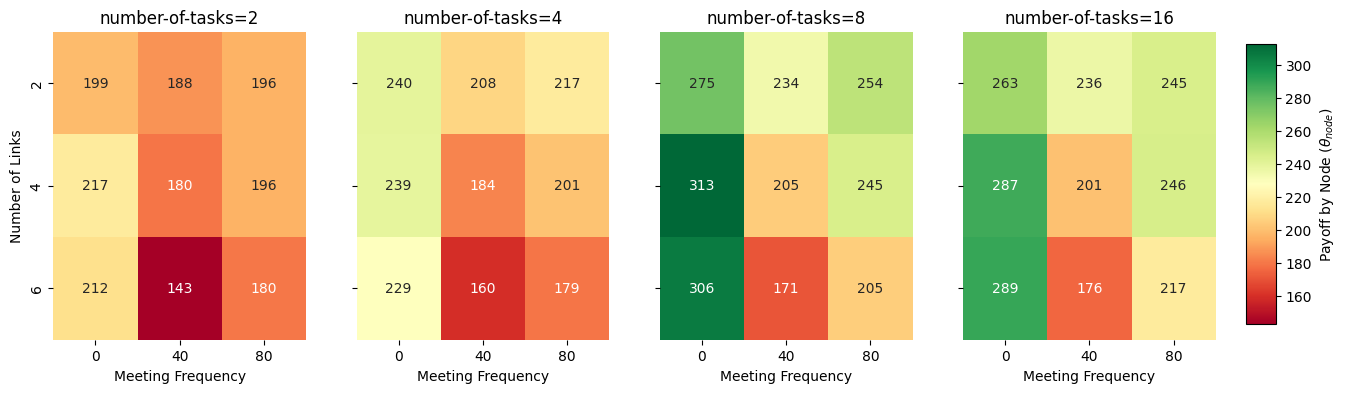

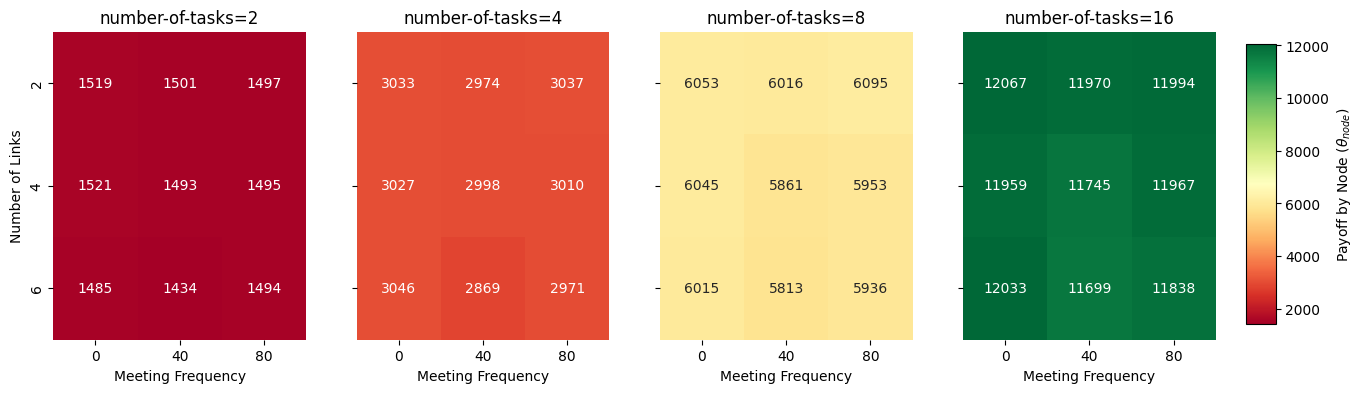

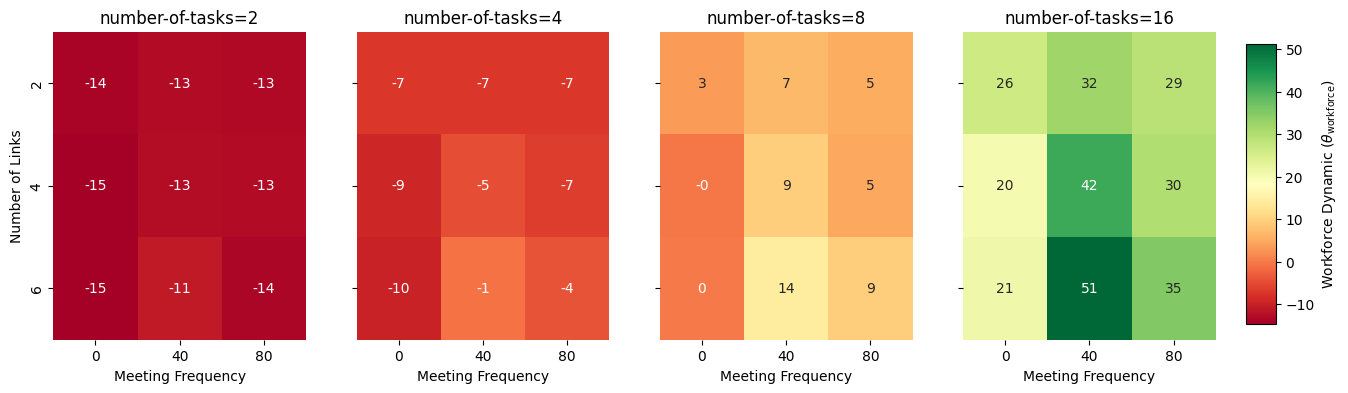

In [116]:
# Load the dataset (skip the first 6 lines)
file_path = "../experiments/tables/new2 FINAL_SENSITIV_NUM_TAKS-table.csv"
df_2 = pd.read_csv(file_path, skiprows=6)

# Filter the dataframe to consider only the last row for each run
df_2 = df_2.loc[df_2['[step]'] == 2079]

# Select columns for independent variables (num_links, meeting-freq) and the parameter to vary (alpha)
cols_oi_2 = ['num_links', 'meeting-freq']
sens_param_1 = 'number-of-tasks'

# Plot for 'payoff_per_node_avg'
plot_heatmaps(df_2, cols_oi_2, 'payoff_per_node_avg', sens_param_1, df_2[sens_param_1].unique())

# Plot for 'payoff_tasks_finished'
plot_heatmaps(df_2, cols_oi_2, 'payoff_tasks_finished', sens_param_1, df_2[sens_param_1].unique())

# Plot for workforce dynamic (hired - fired)
plot_workforce_dynamic(df_2, cols_oi_1, sens_param_1, df_2[sens_param_1].unique())